In [153]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [130]:
labels = ['vsync_60', 'no_vsync_60', 'vsync_500', 'no_vsync_500']

In [131]:
PATH_VSYNC_60 = "../../data/vsync_on_60hz"
PATH_NO_VSYNC_60 = "../../data/vsync_off_60Hz"
PATH_VSYNC_500 = "../../data/vsync_on_500hz"
PATH_NO_VSYNC_500 = "../../data/finals_all_0106"

PATHS = [PATH_VSYNC_60, PATH_NO_VSYNC_60, PATH_VSYNC_500, PATH_NO_VSYNC_500]

In [132]:
files_vsync_60 = os.listdir(PATH_VSYNC_60)
files_vsync_60 = [x for x in files_vsync_60 if 'csv' in x]

files_no_vsync_60 = os.listdir(PATH_NO_VSYNC_60)
files_no_vsync_60 = [x for x in files_no_vsync_60 if 'csv' in x]

files_vsync_500 = os.listdir(PATH_VSYNC_500)
files_vsync_500 = [x for x in files_vsync_500 if 'csv' in x]

files_no_vsync_500 = os.listdir(PATH_NO_VSYNC_500)
files_no_vsync_500 = [x for x in files_no_vsync_500 if 'csv' in x]

files = [files_vsync_60, files_no_vsync_60, files_vsync_500, files_no_vsync_500]

In [133]:
data_dict = {}
for i, f in enumerate(files):
    file_data = []
    diff_means = []
    diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
    for file in f:
        data_in = pd.read_csv(f"{PATHS[i]}/{file}", index_col=False)
        try:
            mean = data_in.query("fw != -1")['diff'].mean()
            if not math.isnan(mean):
                diff_means.append(mean)
                diff_program_means_dict[data_in['program'][1]].append(mean)
        except:
            #print(data_in, file)
            pass
        file_data.append(data_in)
        
    data = pd.concat(file_data)
    data_dict[labels[i]] = data

data_dict[labels[0]]


,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61405,64409,11513,49892
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66421,69780,16373,50048
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53293,56644,20275,33018
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66216,69579,16273,49943
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59661,63011,9659,50002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,59871,63395,27481,32390
196,196,196,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,52629,56154,20211,32418
197,197,197,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,60903,64429,28421,32482
198,198,198,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,61043,64393,28504,32539


In [134]:
for key, value in data_dict.items():
    value = value[value['complexity'] == 'default']
    value = value[value['program'] != 'bitblt']
    value = value[value['program'] != 'getdbits']
    value = value[value['fullscreen'] == 'fullscreen']

data_dict[labels[0]]['vsync'] = 1
data_dict[labels[1]]['vsync'] = 0
data_dict[labels[2]]['vsync'] = 1
data_dict[labels[3]]['vsync'] = 0

data_dict[labels[0]]['refresh_rate'] = 60
data_dict[labels[1]]['refresh_rate'] = 60
data_dict[labels[2]]['refresh_rate'] = 500
data_dict[labels[3]]['refresh_rate'] = 500


In [135]:
data_dict[labels[0]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61405,64409,11513,49892,1,60
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66421,69780,16373,50048,1,60
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53293,56644,20275,33018,1,60
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66216,69579,16273,49943,1,60
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59661,63011,9659,50002,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,59871,63395,27481,32390,1,60
196,196,196,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,52629,56154,20211,32418,1,60
197,197,197,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,60903,64429,28421,32482,1,60
198,198,198,2357,wxpython,default,wxpython_default,fullscreen,2.0,windup,61043,64393,28504,32539,1,60


In [136]:
data_dict[labels[1]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60881,64234,12680,48201,0,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67081,70260,16949,50132,0,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64345,67699,14284,50061,0,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63791,67134,13820,49971,0,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63467,66829,13552,49915,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,53697,57314,21255,32442,0,60
196,196,196,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,62728,66077,29786,32942,0,60
197,197,197,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,54770,58121,22128,32642,0,60
198,198,198,2528,wxpython,default,wxpython_default,fullscreen,2.0,windup,56095,59718,23580,32515,0,60


In [137]:
data_dict[labels[2]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12155,14298,5764,6391,1,500
1,1,1,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11283,13427,5075,6208,1,500
2,2,2,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11643,13786,5308,6335,1,500
3,3,3,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11470,13783,5343,6127,1,500
4,4,4,2324,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11799,13941,5544,6255,1,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,6981,9302,4000,2981,1,500
196,196,196,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,8713,11037,5740,2973,1,500
197,197,197,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,8365,10686,5307,3058,1,500
198,198,198,2408,wxpython,default,wxpython_default,fullscreen,2.0,windup,5941,8439,3058,2883,1,500


In [138]:
data_temp = data_dict[labels[3]]
data_temp = data_temp[data_temp['program'] != 'bitblt']
data_temp = data_temp[data_temp['program'] != 'getdbits']
data_temp = data_temp[data_temp['complexity'] == 'default']
data_temp = data_temp[data_temp['fullscreen'] == 'fullscreen']
data_dict[labels[3]] = data_temp
data_dict[labels[3]]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11810,14128,5701,6109,0,500
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12160,14305,6129,6031,0,500
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,13260,4799,5973,0,500
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11461,13775,5455,6006,0,500
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,12916,7094,3678,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8009,10332,4494,3515,0,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8011,10335,4916,3095,0,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7496,9646,4322,3174,0,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7330,9647,4029,3301,0,500


In [139]:
data = pd.concat([data_dict[labels[0]], data_dict[labels[1]], data_dict[labels[2]], data_dict[labels[3]]])
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,61.405,64.409,11.513,49.892,1,60
1,1,1,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66.421,69.780,16.373,50.048,1,60
2,2,2,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,53.293,56.644,20.275,33.018,1,60
3,3,3,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,66.216,69.579,16.273,49.943,1,60
4,4,4,2363,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,59.661,63.011,9.659,50.002,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.009,10.332,4.494,3.515,0,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.011,10.335,4.916,3.095,0,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.496,9.646,4.322,3.174,0,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.330,9.647,4.029,3.301,0,500


# Which frameworks have active VSYNC?

In [140]:
vsync_off_frameworks = []
for framework in data['framework'].unique():
    data_fw = data[data['framework'] == framework]
    vsync_counter= len(data_fw[data_fw['ete_upper'] > data_fw['ete_lower']])

    print(f'{framework}: vsync off detected {vsync_counter} times')
    if vsync_counter > 0:
        vsync_off_frameworks.append(framework)
print(vsync_off_frameworks)

Blend2D: vsync off detected 0 times
Cairo: vsync off detected 0 times
Direct2D: vsync off detected 7 times
Direct3D: vsync off detected 338 times
FLTK: vsync off detected 0 times
GDIplus: vsync off detected 0 times
GLEW: vsync off detected 228 times
GLUT: vsync off detected 0 times
GTK: vsync off detected 564 times
Java2D: vsync off detected 569 times
JavaSwing: vsync off detected 560 times
pygame: vsync off detected 200 times
pyglet: vsync off detected 373 times
pyqt5: vsync off detected 0 times
pyqt6: vsync off detected 0 times
pyqt6_quick: vsync off detected 560 times
Qt5: vsync off detected 0 times
Qt6: vsync off detected 0 times
SDL2_Direct3D: vsync off detected 566 times
SDL2_OpenGLES: vsync off detected 565 times
SDL2_OpenGL: vsync off detected 569 times
SDL2_Software: vsync off detected 0 times
SFML: vsync off detected 230 times
Skia: vsync off detected 196 times
tkinter: vsync off detected 0 times
WinAPI: vsync off detected 0 times
WinUI: vsync off detected 0 times
wxpython_d2

# Plot 

In [141]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_NONE = '#8E8E8D'

In [142]:
data_filtered = data[data['framework'].isin(vsync_off_frameworks)]
data_filtered

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,47.129,50.480,14.530,32.599,1,60
1,1,1,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,42.108,45.455,9.179,32.929,1,60
2,2,2,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,46.408,49.762,1.342,45.066,1,60
3,3,3,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,50.203,53.727,1.302,48.901,1,60
4,4,4,2357,Direct2D,default,Direct2D_default,fullscreen,2.0,getpixel,41.926,45.278,8.916,33.010,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2311,Skia,default,Skia_default,fullscreen,3.0,windup,7.497,7.753,3.525,3.972,0,500
196,196,196,2311,Skia,default,Skia_default,fullscreen,3.0,windup,6.632,6.889,2.888,3.744,0,500
197,197,197,2311,Skia,default,Skia_default,fullscreen,3.0,windup,6.634,6.891,2.846,3.788,0,500
198,198,198,2311,Skia,default,Skia_default,fullscreen,3.0,windup,8.534,8.620,3.230,5.304,0,500


In [143]:
# data_temp = data_filtered[data_filtered['refresh_rate'] == 60]

# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data_temp['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0)

# legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

# plt.savefig("point_swarm_vsync_getpixel_60.pdf", format='pdf')

In [144]:
# data_temp = data_temp[data_temp['fw'] < 200]
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data_temp['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0)

# legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

# plt.savefig("point_swarm_vsync_windup_60.pdf", format='pdf')

In [145]:
# data_temp = data_filtered[data_filtered['refresh_rate'] == 500]

# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data_temp['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0)

# legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

# plt.savefig("point_swarm_vsync_getpixel_500.pdf", format='pdf')

In [146]:
# data_temp = data_temp[data_temp['fw'] < 500]  # ein ausreißer bei 8000 -> ignorieren

# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data_temp['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0)

# legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

# plt.savefig("point_swarm_vsync_windup_500.pdf", format='pdf')

In [157]:
data_temp[(data_temp['program'] == 'getpixel') & (data_temp['framework'] == 'Direct3D')]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,vsync,refresh_rate
0,0,0,2504,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,40.472,43.831,-0.001,40.473,1,60
1,1,1,2504,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,33.271,36.623,-0.001,33.272,1,60
2,2,2,2504,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,27.963,31.325,-0.001,27.964,1,60
3,3,3,2504,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,27.164,30.515,-0.001,27.165,1,60
4,4,4,2504,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,28.223,32.371,-0.001,28.224,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2505,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,18.152,5.319,-0.001,18.153,0,60
196,196,196,2505,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,20.002,6.371,-0.001,20.003,0,60
197,197,197,2505,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,23.987,10.616,-0.001,23.988,0,60
198,198,198,2505,Direct3D,default,Direct3D_default,fullscreen,3.0,getpixel,26.907,13.811,-0.001,26.908,0,60


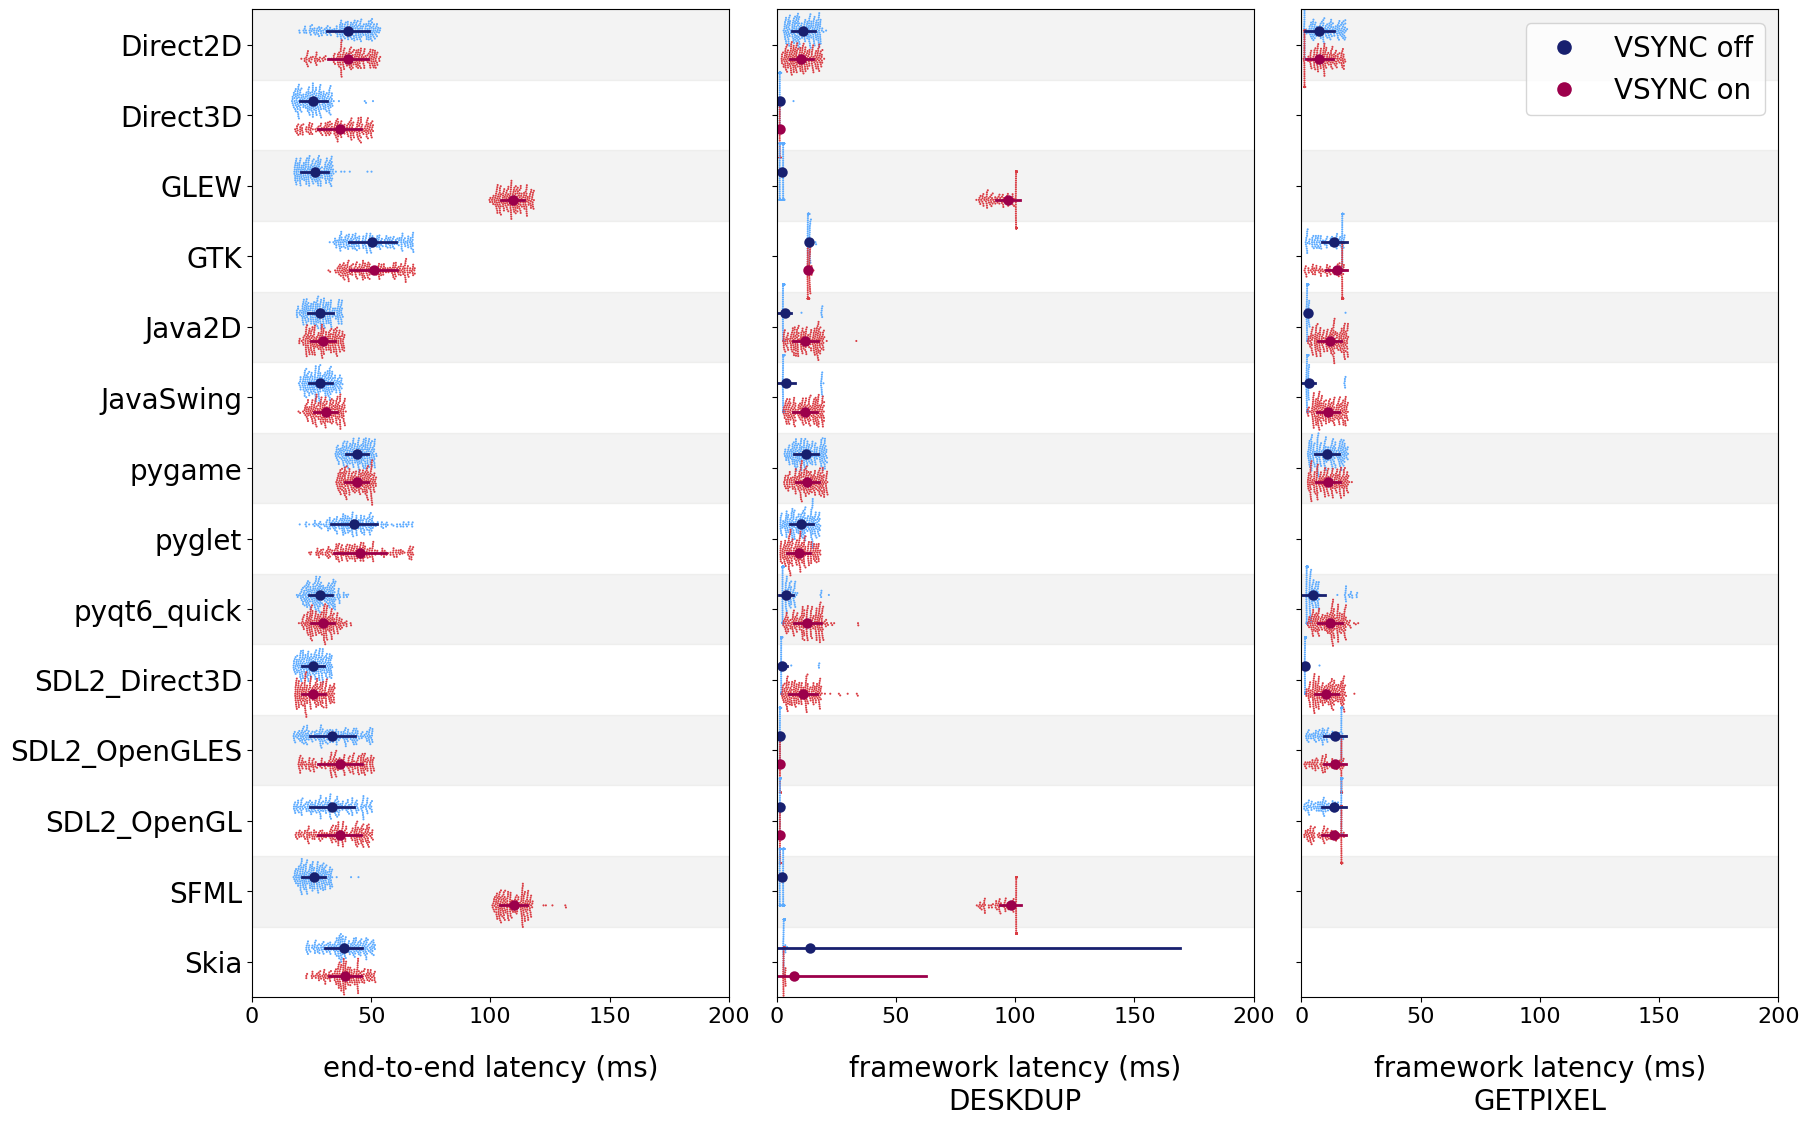

In [162]:
data_temp = data_filtered[data_filtered['refresh_rate'] == 60]

fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

# stripped background
for i in range(len(data_temp['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0, right=200)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
legend.get_texts()[0].set_text('VSYNC off')
legend.get_texts()[1].set_text('VSYNC on')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("vsync_60hz.pdf", format='pdf')

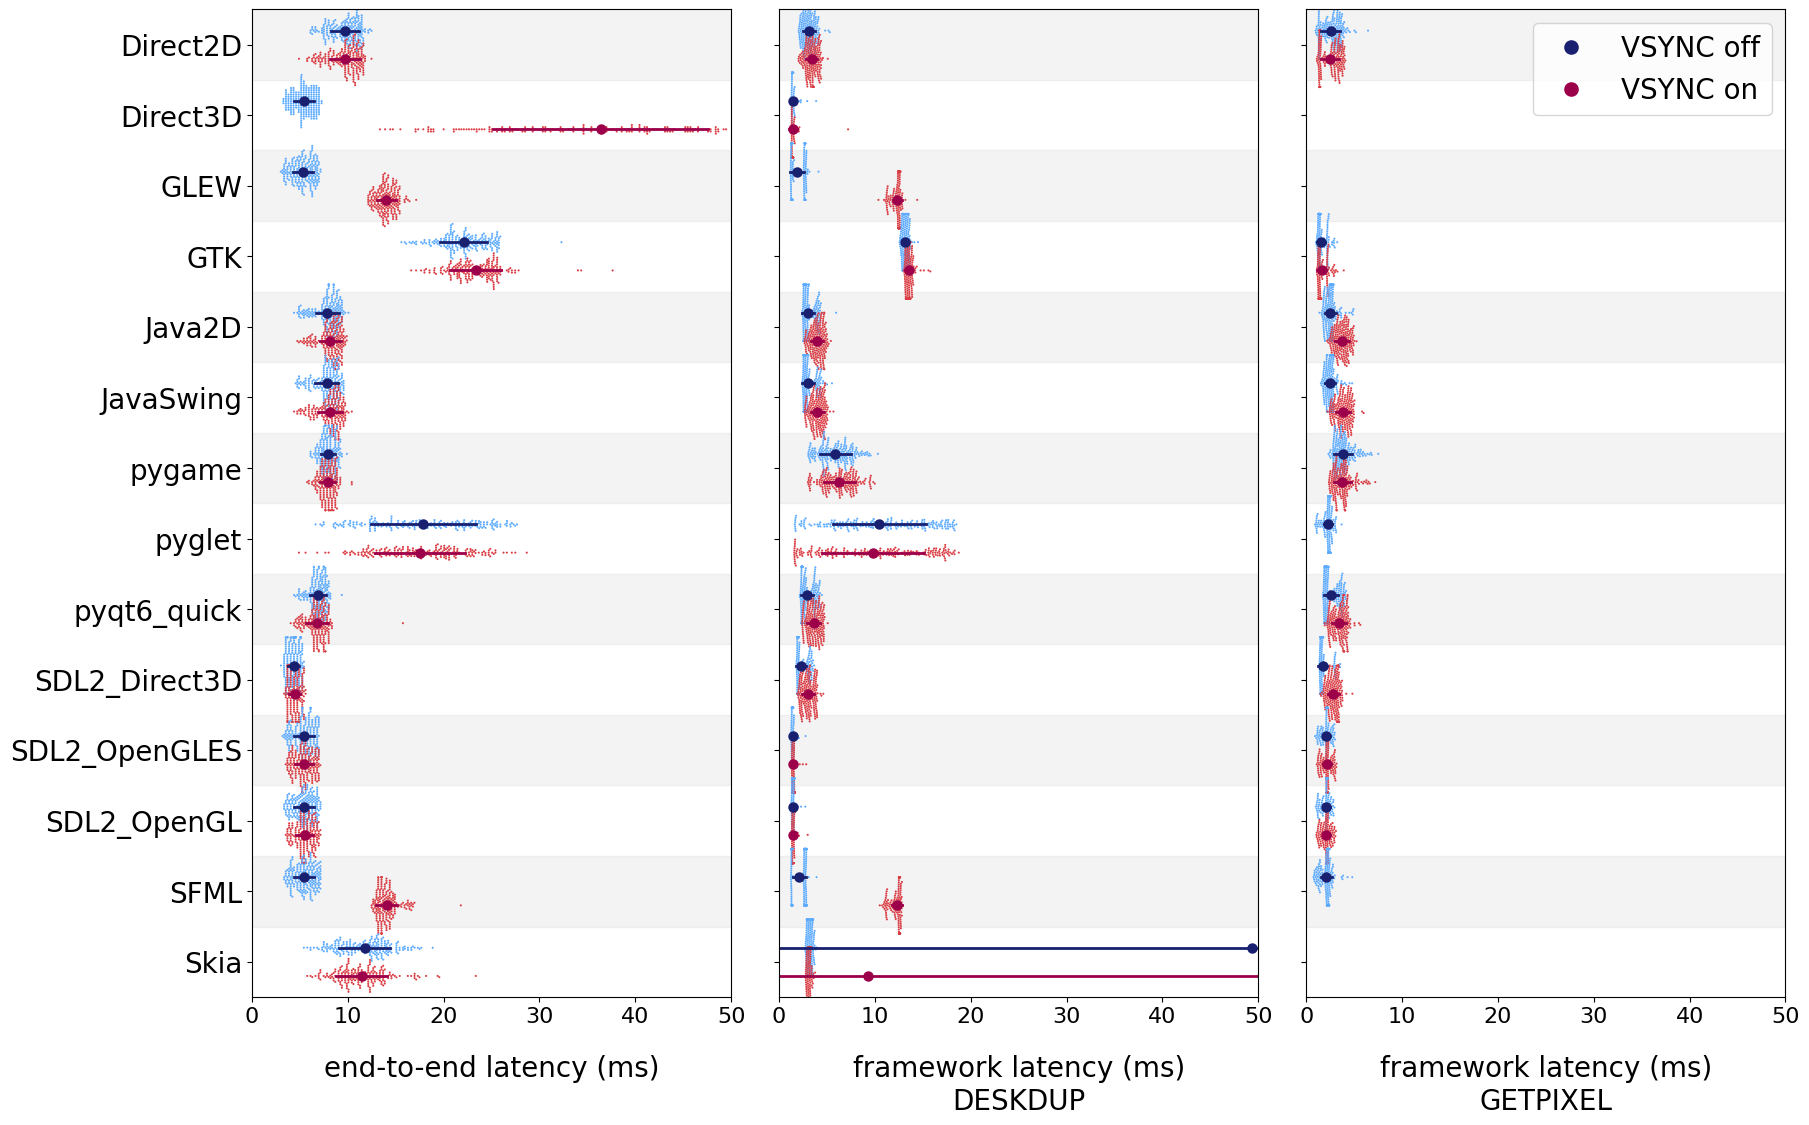

In [161]:
data_temp = data_filtered[data_filtered['refresh_rate'] == 500]

fig, axs = plt.subplots(1, 3, layout='constrained', sharex=True, sharey=True, figsize=(20, 14))
axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

# stripped background
for i in range(len(data_temp['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
        axs[2].axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
axs[0].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)
axs[2].set_ylim(-0.5, len(data_temp['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', size=1.5, dodge=True, hue_order=[0, 1], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'none'], x='ete_upper', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[(data_temp['program'] == 'windup') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)
plot = sns.pointplot(ax=axs[2], data=data_temp[(data_temp['program'] == 'getpixel') & (data_temp['fw'] != -0.001)], x='fw', y='framework', hue='vsync', hue_order=[0, 1], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2, linewidth=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=20)
axs[1].set_xlabel('framework latency (ms)\nDESKDUP', fontsize=20)
axs[2].set_xlabel('framework latency (ms)\nGETPIXEL', fontsize=20)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[2].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0, right=50)

legend = plt.legend(title='', fontsize=20, loc='upper right', markerscale=1.5)
legend.get_texts()[0].set_text('VSYNC off')
legend.get_texts()[1].set_text('VSYNC on')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig("vsync_500hz.pdf", format='pdf')